In [1]:
import pickle
import os
import numpy as np
import torch
import pandas as pd

# Load data

In [2]:
from plot_utils import *

In [3]:
from importlib import reload

import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
from data_collapse import *

In [5]:
from importlib import reload

import data_collapse
reload(data_collapse)
from data_collapse import *

## xj={0}

In [23]:
params_list=[
# ({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,1.0,101),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([8,12,16])}),
# ({'xj':'0','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([20])}),
# ({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(4),'L':np.array([20])}),
# ({'xj':'0','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])})
({'xj':'0','en':2000,'anc':False,'p_proj':0},{'p_ctrl':np.arange(0.65,1.01,0.05),'s':np.arange(1),'L':np.array([8,12,16])}),
({'xj':'0','en':1000,'anc':False,'p_proj':0},{'p_ctrl':np.arange(0.65,1.01,0.05),'s':np.arange(2),'L':np.array([20])}),
({'xj':'0','en':500,'anc':False,'p_proj':0},{'p_ctrl':np.arange(0.65,1.01,0.05),'s':np.arange(4),'L':np.array([20])}),
({'xj':'0','en':60,'anc':False,'p_proj':0},{'p_ctrl':np.arange(0.65,1.01,0.05),'s':np.arange(32),'L':np.array([24])})
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        fn_dir_template='/mnt/e/Control_Transition/Metrics/{xj}/',
        input_params_template='{s} {p_ctrl:.2f} {p_proj:.2f} {L:d} {L+2:d} {xj.replace("-","/"):s} {en:d} {"-ancilla"*anc}',
        load_data=load_pickle,
        filename='params_FM.txt',
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )


# df_0=convert_pd(data_0_dict,names=['Metrics','L','p_ctrl','p_proj'])


generate_params: 100%|██████████| 256/256 [00:00<00:00, 11792.62it/s]


In [7]:
params_list=[
# ({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,1.0,101),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([8,12,16])}),
# ({'xj':'0','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([20])}),
# ({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(4),'L':np.array([20])}),
# ({'xj':'0','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])})
({'xj':'0','en':2000,'anc':False,'p_proj':0},{'p_ctrl':np.linspace(0,1.0,101),'s':np.arange(2),'L':np.array([8,12,16])}),
({'xj':'0','en':1000,'anc':False,'p_proj':0},{'p_ctrl':np.linspace(0,1.0,101),'s':np.arange(2),'L':np.array([20])}),
({'xj':'0','en':500,'anc':False,'p_proj':0},{'p_ctrl':np.linspace(0,1.0,101),'s':np.arange(4),'L':np.array([20])}),
({'xj':'0','en':60,'anc':False,'p_proj':0},{'p_ctrl':np.linspace(0,1.0,101),'s':np.arange(32),'L':np.array([24])})
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        # fn_dir_template='/mnt/e/Control_Transition/Metrics/{xj}/',
        fn_dir_template='./data/Metrics/{xj}/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}.pickle', 
    )


df_0=convert_pd(data_0_dict,names=['Metrics','L','p_ctrl','p_proj'])


Loading data_dict ./data/Metrics/0/xj(0).pickle


generate_params: 100%|██████████| 606/606 [00:00<00:00, 16726.76it/s]


Loading data_dict ./data/Metrics/0/xj(0).pickle


generate_params: 100%|██████████| 202/202 [00:00<00:00, 16099.75it/s]


Loading data_dict ./data/Metrics/0/xj(0).pickle


generate_params: 100%|██████████| 404/404 [00:00<00:00, 15558.42it/s]


Loading data_dict ./data/Metrics/0/xj(0).pickle


generate_params: 100%|██████████| 3232/3232 [00:00<00:00, 17174.87it/s]


In [8]:
len(data_0_dict['fn'])

2569

In [8]:
all_files=set(os.listdir('Data/Metrics/0'))

In [9]:
len(all_files)

14175

In [10]:
[fn for fn in all_files-data_0_dict['fn']]

['CT_En200_pctrl(0.00,0.00,1)_pproj(0.00,0.00,1)_L(20,22,2)_xj(0)_seed0_64.pickle',
 'CT_En200_pctrl(0.03,0.03,1)_pproj(0.00,0.00,1)_L(20,22,2)_xj(0)_seed0_64.pickle',
 'CT_En200_pctrl(0.06,0.06,1)_pproj(0.00,0.00,1)_L(20,22,2)_xj(0)_seed0_64.pickle',
 'CT_En14_pctrl(0.00,0.00,1)_pproj(0.00,0.00,1)_L(24,26,2)_xj(0)_seed0_64.pickle',
 'xj(0).pickle']

In [9]:
df_0

observations
Metrics L  p_ctrl p_proj                                                   
EE      20 0.00   0.00    [6.430996, 6.431635, 6.431778, 6.431554, 6.432...
O       20 0.00   0.00    [7.113814e-05, -4.0365758e-05, 0.0004151076, 0...
TMI     20 0.00   0.00    [-5.4331512, -5.4342747, -5.434207, -5.4336934...
EE      20 0.00   0.03    [5.0904408, 5.7017803, 5.248832, 5.469063, 5.3...
O       20 0.00   0.03    [0.014078076, 0.011018689, 0.0086944075, -0.01...
...                                                                     ...
        24 0.95   0.00    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
TMI     24 0.95   0.00    [-9.974526e-31, -9.974526e-31, -2.3841866e-07,...
EE      24 1.00   0.00    [3.3944722e-31, 3.3944722e-31, 3.3944722e-31, ...
O       24 1.00   0.00    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
TMI     24 1.00   0.00    [-9.974526e-31, -9.974526e-31, -9.974526e-31, ...

[2238 rows x 1 columns]

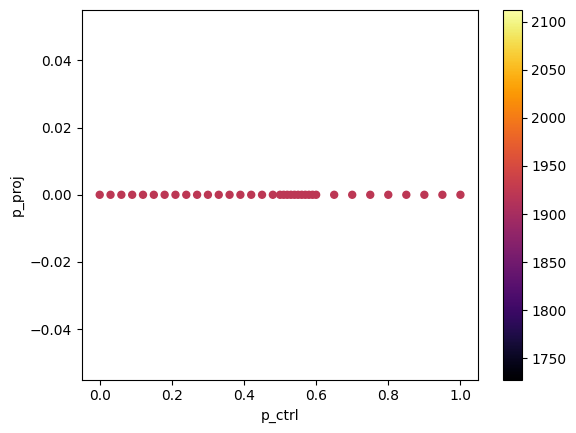

In [10]:
visualize_dataset(df_0,params={'Metrics':'O','L':24},xlabel='p_ctrl',ylabel='p_proj')

# Data collapse

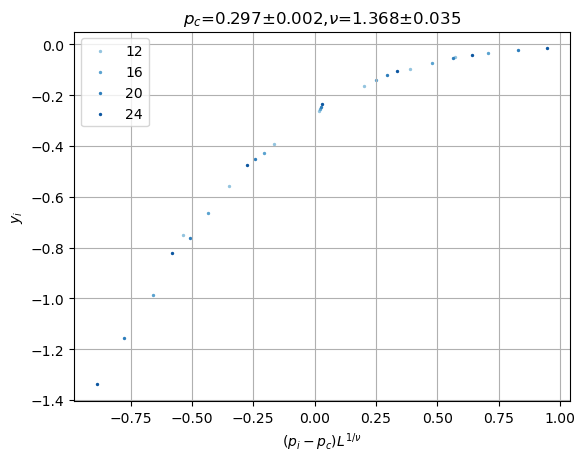

In [15]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=24,p_range=[0.2,0.4],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.3,p_c=0.29,)
dc.plot_data_collapse(s=2)

In [57]:
def bootstraping(df,params,p_,L_,p_range,nu,p_c,rng=0,Lmin=None,Lmax=None,):
    rng=np.random.default_rng(rng)
    df_small=df.xs(params.values(),level=list(params.keys()),drop_level=False)
    df_resample=df_small.applymap(lambda x: rng.choice(x,size=len(x),replace=True))
    dc=DataCollapse(df=df_resample,params=params,Lmin=Lmin,Lmax=Lmax,p_range=p_range,p_=p_,L_=L_)
    dc.datacollapse(nu=nu,p_c=p_c,)
    return dc


In [73]:
resampling=[bootstraping(df_0,params={'Metrics':'TMI','p_proj':0},p_='p_ctrl',L_='L',p_range=[.2,.4],nu=1.3,p_c=.29,rng=idx) for idx in range(100)]

In [72]:
z[2].res.params['p_c'].value

0.31150145577743915

In [76]:
p_c_list=[r.res.params['p_c'].value for r in resampling]

In [77]:
nu_list=[r.res.params['nu'].value for r in resampling]

In [78]:
np.mean(p_c_list)

0.31095356404025176

In [79]:
np.mean(nu_list)

1.2312210219370323

In [87]:
np.min(p_c_list),np.max(p_c_list)

(0.3081659942890572, 0.31345079136086884)

In [86]:
np.min(nu_list),np.max(nu_list)

(1.1687209107468028, 1.304976084559286)

In [88]:
from scipy.stats import sem

In [91]:
np.std(p_c_list)

0.0010205767727454597

In [92]:
np.std(nu_list)

0.026293874925900993

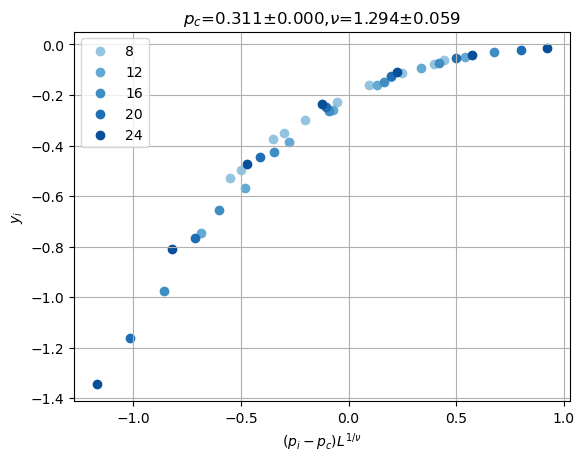

In [64]:
z.plot_data_collapse()

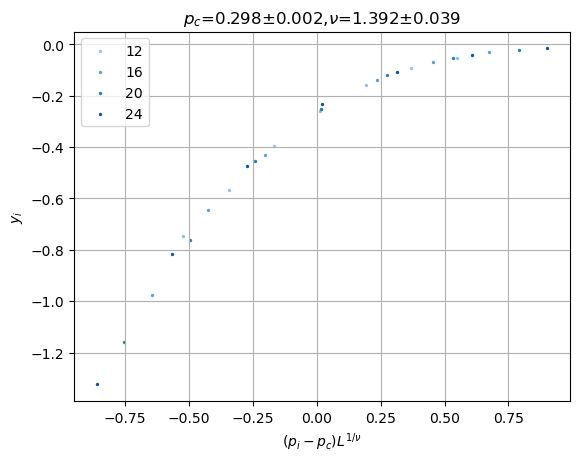

In [48]:
dc=DataCollapse(df=df_0_resample,params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=24,p_range=[0.2,0.4],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.3,p_c=0.29,)
dc.plot_data_collapse(s=2)

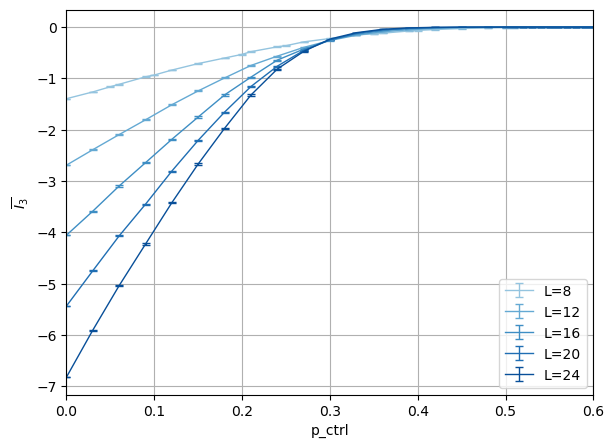

In [47]:
plot_line_inset(df=df_0_resample,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.},
yscale=None,
errorbar=True,
filename=None,
)

# Half-cut entanglement entropy

In [26]:
import matplotlib.pyplot as plt

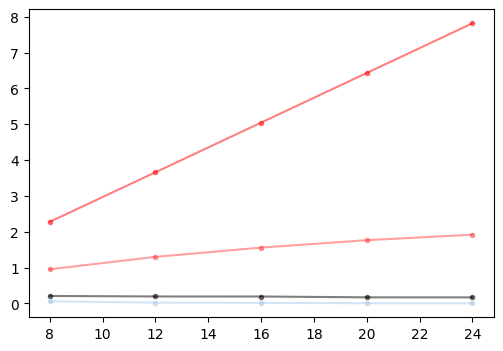

In [40]:
fig, ax = plt.subplots(figsize=(6, 4))

p_list =[0,0.3,0.5,0.6]
colors = ['#ff0000','#ff4545','k','#a6caec']
for idx,p in enumerate(p_list):
    data_ = (df_0.xs('EE',level='Metrics').xs(0.,level='p_proj').xs(p,level='p_ctrl')['observations']).sort_index()
    data_mean = data_.apply(np.mean)
    data_std = data_.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(data_mean.index, data_mean.values, yerr=data_std.values, fmt='.-',  label='EE',color=colors[idx],alpha=0.5)
# ax.set_yscale('log')

In [ ]:
k